In [32]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
spark = SparkSession \
    .builder \
    .appName("532: Project") \
    .config("local[1]") \
    .getOrCreate()

In [3]:
df = pd.read_csv("arson.txt", delimiter="^")

In [12]:
df

,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,CASE_STAT,AVAIL_MFI,MOT_FACTS1,MOT_FACTS2,...,INIT_OB5,INIT_OB6,INIT_OB7,INIT_OB8,LAB_USED1,LAB_USED2,LAB_USED3,LAB_USED4,LAB_USED5,LAB_USED6
0,AK,13000,4082014,0000439,0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,13000,6162014,0000775,0,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,13000,8232014,0001218,0,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,13000,8302014,0001262,0,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,13000,9242014,0001385,0,5.0,3.0,2,UU,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39011,WY,37329,4292014,0000550,0,5.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39012,WY,37329,9012014,0001325,0,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39013,WY,37635,6142014,0142,0,5.0,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39014,WY,37635,6152014,0148,0,5.0,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
months = df['INC_DATE']//1000000
months.tail()

39011    4
39012    9
39013    6
39014    6
39015    3
Name: INC_DATE, dtype: int64

In [11]:
month, incidents = np.unique(months, return_counts = True)

<BarContainer object of 12 artists>

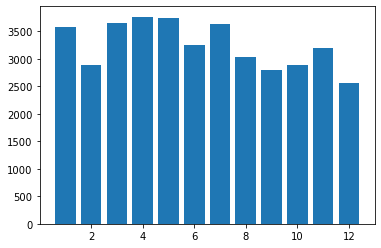

In [12]:
plt.bar(month, incidents)

In [13]:
s_incidents = df.STATE.value_counts(dropna=True)

<AxesSubplot:>

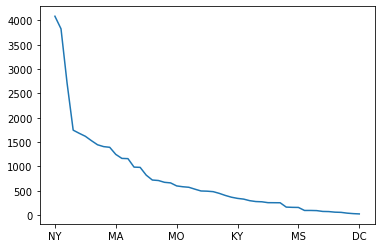

In [14]:
s_incidents.plot()

In [15]:
hazmat_df = pd.read_csv("hazmat.txt", delimiter="^")

In [16]:
hazmat_df

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,REL_FROM,REL_STORY,POP_DENS,...,FACT_REL1,FACT_REL2,FACT_REL3,MIT_FACT1,MIT_FACT2,MIT_FACT3,EQ_INV_REL,HAZ_DISPO,HAZ_DEATH,HAZ_INJ
0,AK_11100_02072020_20473_0,AK,11100,2072020,20473,0,5.0,2.0,1.0,2.0,...,56,NaN,NaN,NaN,NaN,NaN,NNN,8.0,NaN,NaN
1,AK_11100_09282020_203531_0,AK,11100,9282020,203531,0,5.0,NaN,NaN,2.0,...,UU,NaN,NaN,NN,NaN,NaN,UUU,8.0,NaN,NaN
2,AK_13000_01142020_55_0,AK,13000,1142020,55,0,5.0,1.0,NaN,1.0,...,50,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
3,AK_23100_01022020_0000123_0,AK,23100,1022020,0000123,0,5.0,NaN,NaN,NaN,...,50,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,AK_23100_01032020_0000253_0,AK,23100,1032020,0000253,0,5.0,NaN,NaN,NaN,...,97,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12030,WY_39405_10212020_203532_0,WY,39405,10212020,203532,0,5.0,2.0,NaN,2.0,...,34,62.0,NaN,15,16.0,NaN,NaN,1.0,NaN,NaN
12031,WY_41403_03142020_102_0,WY,41403,3142020,102,0,5.0,2.0,NaN,3.0,...,33,78.0,NaN,31,NaN,NaN,229,1.0,NaN,NaN
12032,WY_43507_01242020_9_0,WY,43507,1242020,9,0,5.0,2.0,NaN,3.0,...,34,NaN,NaN,NN,NaN,NaN,NaN,2.0,NaN,NaN
12033,WY_43507_02262020_19_0,WY,43507,2262020,19,0,5.0,1.0,1.0,2.0,...,50,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [6]:
state  = hazmat_df['STATE']
states = np.unique(state, return_counts = True)
states

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 144,   46,  128,  403,  781,  363,   71,  388,    3,  774,  238,
          60,   63,   18,  581,   98,   77,   30,  179,  644,  104,   53,
         127,   68,   32,   21,   20,  477,   19,   69,  163,   79,   42,
         245,  453,  292,   52,   88, 1915,   41,   72,    5,  104,  777,
         524,  573,   10,  294,  199,   10,   18]))

<AxesSubplot:>

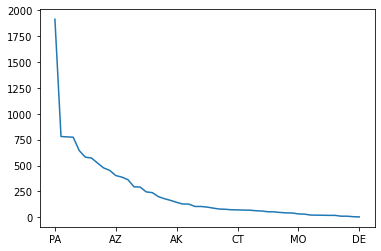

In [23]:
s_incidents = hazmat_df.STATE.value_counts(dropna=True)
s_incidents.plot()

In [26]:
months = hazmat_df['INC_DATE']//1000000
months.tail()

12030    10
12031     3
12032     1
12033     2
12034     7
Name: INC_DATE, dtype: int64

# loading civilian casuality data, firefighter casuality and basic module

In [42]:
from pyspark.sql import functions as F

In [35]:
civilian_casualities_df = spark.read.options(delimiter="^", header=True).csv("civiliancasualty.txt")

In [36]:
firefighter_casualities_df = spark.read.options(delimiter="^", header=True).csv("ffcasualty.txt")

In [37]:
basic_module_df = spark.read.options(delimiter="^", header=True).csv("basicincident.txt")

In [21]:
basic_module_df.printSchema()

root
 |-- INCIDENT_KEY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- FDID: string (nullable = true)
 |-- INC_DATE: string (nullable = true)
 |-- INC_NO: string (nullable = true)
 |-- EXP_NO: string (nullable = true)
 |-- VERSION: string (nullable = true)
 |-- DEPT_STA: string (nullable = true)
 |-- INC_TYPE: string (nullable = true)
 |-- ADD_WILD: string (nullable = true)
 |-- AID: string (nullable = true)
 |-- ALARM: string (nullable = true)
 |-- ARRIVAL: string (nullable = true)
 |-- INC_CONT: string (nullable = true)
 |-- LU_CLEAR: string (nullable = true)
 |-- SHIFT: string (nullable = true)
 |-- ALARMS: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- ACT_TAK1: string (nullable = true)
 |-- ACT_TAK2: string (nullable = true)
 |-- ACT_TAK3: string (nullable = true)
 |-- APP_MOD: string (nullable = true)
 |-- SUP_APP: string (nullable = true)
 |-- EMS_APP: string (nullable = true)
 |-- OTH_APP: string (nullable = true)
 |-- SUP_PER: string 

In [38]:
basic_module_df.groupBy("CONT_LOSS").count().collect()

[Row(CONT_LOSS='829', count=1),
 Row(CONT_LOSS='800', count=721),
 Row(CONT_LOSS='125', count=30),
 Row(CONT_LOSS='1372', count=1),
 Row(CONT_LOSS='175000', count=38),
 Row(CONT_LOSS='615000', count=1),
 Row(CONT_LOSS='14000', count=59),
 Row(CONT_LOSS='2700', count=9),
 Row(CONT_LOSS='50001', count=2),
 Row(CONT_LOSS='51', count=4),
 Row(CONT_LOSS='495000', count=1),
 Row(CONT_LOSS='11878', count=1),
 Row(CONT_LOSS='18714', count=1),
 Row(CONT_LOSS='14340', count=1),
 Row(CONT_LOSS='1500', count=2717),
 Row(CONT_LOSS='1445', count=1),
 Row(CONT_LOSS='18750', count=15),
 Row(CONT_LOSS='150000', count=502),
 Row(CONT_LOSS='22895', count=1),
 Row(CONT_LOSS='50911', count=1),
 Row(CONT_LOSS='3848', count=1),
 Row(CONT_LOSS='82583', count=1),
 Row(CONT_LOSS='240000', count=7),
 Row(CONT_LOSS='577', count=1),
 Row(CONT_LOSS='544000', count=1),
 Row(CONT_LOSS='2200', count=19),
 Row(CONT_LOSS='5321', count=1),
 Row(CONT_LOSS='10487', count=1),
 Row(CONT_LOSS='75500', count=1),
 Row(CONT_LOSS

In [70]:
basic_module_df = basic_module_df.na.drop(subset=("PROP_LOSS","CONT_LOSS"))
total_loss = basic_module_df.groupBy("INCIDENT_KEY").agg(F.sum(basic_module_df.PROP_LOSS + basic_module_df.CONT_LOSS).alias("TOTAL_LOSS"))

In [71]:
total_loss.count()

1444056

Technically, not right. Need to drop na before adding because no easy way to check if this will work always.

In [72]:
civilian_severity = civilian_casualities_df.select("INCIDENT_KEY","SEV")
ff_severity = firefighter_casualities_df.select("INCIDENT_KEY","SEVERITY")

In [73]:
civilian_dollar_loss = total_loss.join(civilian_severity, total_loss.INCIDENT_KEY == civilian_severity.INCIDENT_KEY)
firefighter_dollar_loss = total_loss.join(ff_severity, total_loss.INCIDENT_KEY == ff_severity.INCIDENT_KEY)

In [74]:
civilian_dollar_loss.groupBy("SEV").agg(F.avg("TOTAL_LOSS").alias("AVG_LOSS")).show()

+---+------------------+
|SEV|          AVG_LOSS|
+---+------------------+
|  3|  79483.0781527531|
|  5|183130.81066268063|
|  U|         49871.625|
|  1| 72752.35869242199|
|  4| 64030.51603498542|
|  2| 72601.71149966375|
+---+------------------+



In [75]:
firefighter_dollar_loss.groupBy("SEVERITY").agg(F.avg("TOTAL_LOSS").alias("AVG_LOSS")).show()

+--------+------------------+
|SEVERITY|          AVG_LOSS|
+--------+------------------+
|       7|       5669414.375|
|       3|202613.09714889125|
|       5| 99906.39583333333|
|       U|103815.78947368421|
|       6|3003931.7647058824|
|       1|155121.58772949106|
|       4|200074.46902654867|
|       2|189474.27731092437|
+--------+------------------+



In [86]:
basic_time_module_df = basic_module_df.withColumn("ALARM_TIME", F.to_timestamp("ALARM","MMddyyyyHHmm")).withColumn("CONT_TIME", F.to_timestamp("INC_CONT","MMddyyyyHHmm")).withColumn("ARV_TIME", F.to_timestamp("ARRIVAL","MMddyyyyHHmm"))

In [87]:
response_time = basic_time_module_df.withColumn("RESPONSE_TIME", basic_time_module_df.CONT_TIME.cast("long") - basic_time_module_df.ALARM_TIME.cast("long"))

civilian_casualty_response_time = response_time.join(civilian_casualities_df, response_time.INCIDENT_KEY == civilian_casualities_df.INCIDENT_KEY)

In [88]:
civilian_casualty_response_time.groupBy("SEV").agg(F.avg("RESPONSE_TIME").alias("AVG_RSP_TIME")).select("SEV","AVG_RSP_TIME").show()

+---+------------------+
|SEV|      AVG_RSP_TIME|
+---+------------------+
|  3|3311.3513513513512|
|  5|55352.130384167634|
|  U| 4580.606060606061|
|  1|3214.5323741007196|
|  4| 3255.205479452055|
|  2|3411.1973018549747|
+---+------------------+



In [89]:
ff_response_time = basic_time_module_df.withColumn("FF_RESPONSE_TIME", basic_time_module_df.CONT_TIME.cast("long") - basic_time_module_df.ARV_TIME.cast("long"))

ff_severity_response_time = ff_response_time.join(firefighter_casualities_df, ff_response_time.INCIDENT_KEY == firefighter_casualities_df.INCIDENT_KEY)

In [99]:
ff_severity_response_time.groupBy("SEVERITY").agg(F.avg("FF_RESPONSE_TIME").alias("AVG_RSP_TIME")).select("SEVERITY","AVG_RSP_TIME").show()

+--------+------------------+
|SEVERITY|      AVG_RSP_TIME|
+--------+------------------+
|       7|         1247962.5|
|       3|14811.670588235294|
|       5|            5880.0|
|       U|           74915.0|
|       6|          242410.0|
|       1| 14919.53038674033|
|       4| 70525.73394495413|
|       2| 6535.170278637771|
+--------+------------------+



In [5]:
fire_incidents_df = spark.read.options(delimiter="^", header=True).csv("fireincident.txt")

In [6]:
fire_incidents_df.printSchema()

root
 |-- INCIDENT_KEY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- FDID: string (nullable = true)
 |-- INC_DATE: string (nullable = true)
 |-- INC_NO: string (nullable = true)
 |-- EXP_NO: string (nullable = true)
 |-- VERSION: string (nullable = true)
 |-- NUM_UNIT: string (nullable = true)
 |-- NOT_RES: string (nullable = true)
 |-- BLDG_INVOL: string (nullable = true)
 |-- ACRES_BURN: string (nullable = true)
 |-- LESS_1ACRE: string (nullable = true)
 |-- ON_SITE_M1: string (nullable = true)
 |-- MAT_STOR1: string (nullable = true)
 |-- ON_SITE_M2: string (nullable = true)
 |-- MAT_STOR2: string (nullable = true)
 |-- ON_SITE_M3: string (nullable = true)
 |-- MAT_STOR3: string (nullable = true)
 |-- AREA_ORIG: string (nullable = true)
 |-- HEAT_SOURC: string (nullable = true)
 |-- FIRST_IGN: string (nullable = true)
 |-- CONF_ORIG: string (nullable = true)
 |-- TYPE_MAT: string (nullable = true)
 |-- CAUSE_IGN: string (nullable = true)
 |-- FACT_IGN_1: string

In [69]:
ignition_cause = fire_incidents_df.select("INCIDENT_KEY","CAUSE_IGN")
ignition_cause = ignition_cause.na.drop(subset=("CAUSE_IGN"))
ignition_cause.select('CAUSE_IGN').distinct().show()

+---------+
|CAUSE_IGN|
+---------+
|        3|
|        0|
|        5|
|        U|
|        1|
|        4|
|        2|
+---------+



In [72]:
ignition_cause_vs_loss = total_loss.join(ignition_cause, total_loss.INCIDENT_KEY == ignition_cause.INCIDENT_KEY)

In [73]:
ignition_cause_vs_loss.groupBy("CAUSE_IGN").agg(F.avg("TOTAL_LOSS").alias("AVG_LOSS")).show()

+---------+------------------+
|CAUSE_IGN|          AVG_LOSS|
+---------+------------------+
|        3|15242.249057862919|
|        0| 35729.22572246811|
|        5| 51502.80952183813|
|        U|13574.973333618687|
|        1|  9201.64097173145|
|        4| 43640.38177635527|
|        2|12956.953294596438|
+---------+------------------+



month vs major states vs types of fire

In [115]:
from pyspark.sql.functions import sum, col, desc

incident_state = basic_module_df.select("INCIDENT_KEY", "STATE", "INC_DATE")
incident_state.groupBy('STATE').count().sort(desc("count")).show()

# selecting top 10 states
incident_state = incident_state.withColumn("INC_MONTH", F.month(F.to_date(incident_state.INC_DATE,"MMddyyyy")))

incidents_ca = incident_state.filter(incident_state.STATE == "CA").groupBy("INC_MONTH").count()
incidents_tx = incident_state.filter(incident_state.STATE == "TX").groupBy("INC_MONTH").count()
incidents_pa = incident_state.filter(incident_state.STATE == "PA").groupBy("INC_MONTH").count()
incidents_fl = incident_state.filter(incident_state.STATE == "FL").groupBy("INC_MONTH").count()
incidents_oh = incident_state.filter(incident_state.STATE == "OH").groupBy("INC_MONTH").count()
incidents_ny = incident_state.filter(incident_state.STATE == "NY").groupBy("INC_MONTH").count()
incidents_il = incident_state.filter(incident_state.STATE == "IL").groupBy("INC_MONTH").count()
incidents_ga = incident_state.filter(incident_state.STATE == "GA").groupBy("INC_MONTH").count()
incidents_nc = incident_state.filter(incident_state.STATE == "NC").groupBy("INC_MONTH").count()
incidents_mi = incident_state.filter(incident_state.STATE == "MI").groupBy("INC_MONTH").count()
incidents_ma = incident_state.filter(incident_state.STATE == "MA").groupBy("INC_MONTH").count()

# incidents_ca.show()
# incidents_tx.show()
# incidents_ma.show()

+-----+------+
|STATE| count|
+-----+------+
|   CA|144036|
|   TX| 94231|
|   PA| 92031|
|   FL| 69808|
|   OH| 69475|
|   NY| 62552|
|   IL| 55041|
|   GA| 51846|
|   NC| 51489|
|   MI| 50708|
|   MA| 50192|
|   IN| 37987|
|   VA| 36658|
|   SC| 35597|
|   MN| 34495|
|   TN| 34084|
|   WA| 33666|
|   NJ| 29644|
|   OK| 26207|
|   CO| 25135|
+-----+------+
only showing top 20 rows



+---------+-----+
|INC_MONTH|count|
+---------+-----+
|       12| 3521|
|        1| 3290|
|        6| 4712|
|        3| 4241|
|        5| 5027|
|        9| 4072|
|        4| 4235|
|        8| 5215|
|        7| 4019|
|       10| 4464|
|       11| 3888|
|        2| 3508|
+---------+-----+



In [101]:
incident_type = basic_module_df.select("INCIDENT_KEY", "INC_TYPE")
incident_type.select("INC_TYPE").distinct().show()

+--------+
|INC_TYPE|
+--------+
|     451|
|     462|
|     442|
|     155|
|     132|
|     154|
|     422|
|     138|
|     424|
|     112|
|     113|
|     443|
|     133|
|     162|
|     160|
|     423|
|     171|
|     441|
|     410|
|     110|
+--------+
only showing top 20 rows



In [92]:
incident_type_count = incident_type.groupBy('INC_TYPE').count().select("count")
incident_type_count.show()
incident_type_count.count()

+-----+
|count|
+-----+
| 5204|
|13129|
|10176|
|  486|
|11483|
|29130|
| 4091|
| 7267|
|40593|
| 9961|
|77983|
| 1428|
|  369|
| 7580|
|10694|
|  577|
| 1942|
|10260|
| 3354|
|  178|
+-----+
only showing top 20 rows



72